## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
nr = len(df.index)
print(nr)

294478


c. The number of unique users in the dataset.

In [5]:
len(df['user_id'].unique())

290584

d. The proportion of users converted.

In [6]:
df['user_id'].value_counts().index
newdf = df.drop_duplicates('user_id')
len(newdf[newdf["converted"]==1])/len(newdf.index)

0.1195695564793657

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
print(len(df.index))
len(df[(df.group=="treatment") & (df.landing_page!='new_page')])+len(df[(df.group=="control") & (df.landing_page!='old_page')])

294478


3893

f. Do any of the rows have missing values?

In [8]:
df2 = df[(df.group=="treatment") & (df.landing_page!='new_page')]
orig=len(df2)
df2.dropna(inplace=True)
new=len(df2)
diff1=(orig-new)

df2 = df[(df.group=="control") & (df.landing_page!='old_page')]
orig=len(df2)
df2.dropna(inplace=True)
new=len(df2)
diff2=(orig-new)

print(diff1+diff2)

0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df[((df.group=="treatment") & (df.landing_page!='new_page')) | ((df.group=="control") & (df.landing_page!='old_page'))]
df2 = df.drop(df2.index)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2['user_id'].value_counts().sort_values(ascending=False).head(1)

773192    2
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
temp = df2[(df2['user_id']==773192)]
print(temp)

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop(temp.head(1).index)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
nconvert = len(df2[(df2.converted==1)])
ntot = len(df2.index)
prob = nconvert/ntot
print(prob)

0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
nconvert = len(df2[(df2.converted==1) & (df2.group=='control')])
ntot = len(df2[(df2.group=='control')])
prob_1 = nconvert/ntot
print(prob_1)

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
nconvert = len(df2[(df2.converted==1) & (df2.group=='treatment')])
ntot = len(df2[(df2.group=='treatment')])
prob_2 = nconvert/ntot
print(prob_2)

0.11880806551510564


d. What is the probability that an individual received the new page?

In [18]:
n = len(df2[(df2.landing_page=='new_page')])
print(n)
ntot = len(df2.index)
prob_3 = n/ntot
print(prob_3)

145310
0.5000619442226688


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

Although the difference is not huge, but the old page leads to slightly more conversions of 12.03% as opposed to 11.89% for new page. The "treatment" group always receives the new page. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The null hypothesis is that there is no difference between the conversion rates, **$p_{new}$** - **$p_{old}$** = 0, while the alternative hypothesis is that there is a statistical difference between the new and old, i.e. **$p_{new}$**-**$p_{old}$** > 0. Hence, we bootstrap our sample and caculated the p-value from the distribution of the differences in probabilities.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
nconvert = len(df2[(df2.converted==1)])
ntot = len(df2.index)
pnew=nconvert/ntot
prob

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
pold=pnew
pold

0.11959708724499628

c. What is $n_{new}$?

In [21]:
nnew = len(df2[(df2.landing_page=='new_page')])
print(nnew)

145310


d. What is $n_{old}$?

In [22]:
nold = len(df2[(df2.landing_page=='old_page')])
print(nold)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

(array([ 127976.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,   17334.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

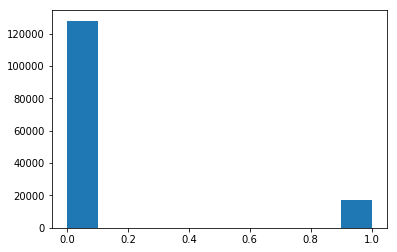

In [23]:
new_page_converted = np.random.binomial(1,pnew,nnew)
plt.hist(new_page_converted)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.binomial(1,pold,nold)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
sum(new_page_converted==1)/nnew-sum(old_page_converted==1)/nold

-0.0013925026680093322

In [26]:
mean1= nnew*pnew
mean2=nold*pold
print(mean1,mean2)

var1 = nnew*pnew*(1-pnew)
var2=nold*pold*(1-pold)
print(var1,var2)

17378.65274757041 17374.34725242959
15300.216498718737 15296.425928255907


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

0.119604038263
9.02745585949e-06


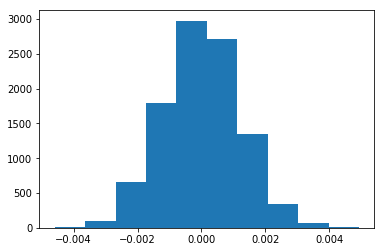

In [27]:
"""
This code simulates 10000 pnew-pold values using binomial distribution. We are generating
a binomial distribution for N_new successes or failures, and repeating the test 
10000 times.
"""

# Generate N successes (new_page_coverted) out of N sample (nnew) views and do it for Ntrials(nsim)
nsim=10000
new_page_converted = np.random.binomial(nnew,pnew,nsim)

# Normalize it to get probability distribution
new_page_converted = new_page_converted/nnew

#Check Mean. Its same as pnew we calculated above
print(new_page_converted.mean())
#plt.hist(new_page_converted)

#Do the same for old page (But remember we have set pold=pnew under the null assumption)
old_page_converted = np.random.binomial(nold,pold,nsim)
old_page_converted = old_page_converted/nold

#Take difference between the two arrays
p_diffs = new_page_converted - old_page_converted

#Mean 
print(p_diffs.mean())
plt.hist(p_diffs)

plt.show()

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.  

Yes, this plot looks like what we expected. Since we simulated this distribution under the null assumption we expect the mean to be at 0, with a normal distribution.   

0.11880806551510564 0.1203863045004612 -0.0015782389853555567


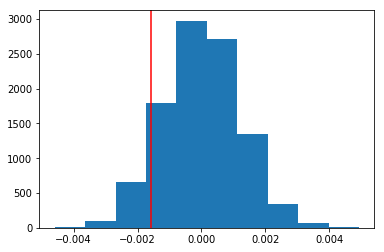

In [28]:
obs_diff = prob_2-prob_1
print(prob_2,prob_1,obs_diff)
plt.hist(p_diffs)
# plot line for observed statistic
plt.axvline(obs_diff,color='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [43]:
#Two ways to calculate this
# Meth. 1:
p_diffsa = np.array(p_diffs)

prop = len(p_diffsa[p_diffsa>obs_diff])/len(p_diffsa)
print(prop)

#Meth. 2:
pval = (p_diffsa>obs_diff).mean()
print('pval = ',pval)

#z-score
zscore = (obs_diff - np.mean(p_diffsa))/np.std(p_diffsa)
print('zscore =',zscore)

0.9051
pval =  0.9051
zscore = -1.31908368454


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We calculated what proportion of the simulated pdiffs (simulated under the null, where the upper limit of the null was 0) is This is called the p-value. We calculate that 90.5% of the pdiffs are greater than the observed difference. This value is very far away from our threshold of 5%. This means we cannot reject the null hypothesis i.e. pnew-pold>0. In other words we conclude that the new page does not give any improvement in the conversion rate.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm

dfc = df2.query('converted==1')
convert_old = len(dfc.query('landing_page=="old_page"'))
convert_new = len(dfc.query('landing_page=="new_page"'))
n_old = len(df2.query('landing_page=="old_page"'))
n_new = len(df2.query('landing_page=="new_page"'))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [40]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score and p-value we computed earlier mean the same as what we do here. This is a one-sided hypothesis test and we obtain values which are very close to the ones in PartII. The z-score gives the deviation from mean, normalized by the standard error, and we see that since the z-score is less than the 1.96 cut-off, which corresponds to a 95% confidence level, we conclude that we cannot reject the null. The p-value gives the area under the curve above the observed value. Since 90.5% of the curve is above the observed value, thats quite a large number and the observed value falls well within the null distribution, and we cannot reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df2.dtypes
#df2_int = df2['group']
#df2_int = df2_int.astype('category').cat.codes
#df2['ab_page']=df2_int
df2['intercept']=1
df2[['dummy','ab_page']]=pd.get_dummies(df2['group'])
df2 = df2.drop('dummy',axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [33]:
train_cols=df2.columns[5:7]
print(train_cols)
logit = sm.Logit(df2['converted'],df2[train_cols])
result = logit.fit()

Index(['intercept', 'ab_page'], dtype='object')
Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Dec 2017   Pseudo R-squ.:               8.077e-06
Time:                        09:48:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  
**Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**
The p-value associated with the ab_page is 0.190. In partII the p-value was 0.905. The null and alternative hypothesis for the regression model is that ab_page coefficient=0 (null) or !=0 (alternative). This is different from the p-value definition in partII, where p-values is a probability, namely the proportions of pdiffs generated under the null which is greater than the observed value. The null hypothesis is that p_new-pold <=0, while the alternative hypothesis is that pnew_pold >0 in part II. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.** One needs to investigate if the conversion rate is influenced just because of a newer page layout or if other factors are influencing the conversion rate. Esentially, we would like to know the variability of the conversion rate. When we add additional terms in the model, the disadvantage is that we need to take into account correlation between the variables and we need to study those variables to make sure they are not correlated to a large extent.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [35]:
df_coun = pd.read_csv("countries.csv")
df_coun.head()
df_coun.count()

user_id    290584
country    290584
dtype: int64

In [36]:
df_coun.head()
mdf = pd.merge(df2, df_coun, how="left", on="user_id")

In [37]:
mdf.head()
mdf_coun = mdf['country'].astype('category').cat.codes
coun_names = pd.get_dummies(mdf['country']).columns
mdf[coun_names]=pd.get_dummies(mdf['country'])
#mdf['country_code']=mdf_coun
#Drop the country column and we need only two countries, so drop one of the countries as well.
mdf_1 = mdf.drop('country',axis=1)
mdf_1 = mdf_1.drop('US',axis=1)

# Create a second data set where we just use countries, so drop ab_page
mdf_2 = mdf_1.drop('ab_page',axis=1)
mdf_2.head()



,user_id,timestamp,group,landing_page,converted,intercept,CA,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0


In [38]:
#Logistic regression fit
train_cols=mdf_2.columns[5:8]

print(train_cols)
logit = sm.Logit(mdf_2['converted'],mdf_2[train_cols])
result = logit.fit()
print(result.summary())

cf1 = np.exp(-0.0408)
cf2 = np.exp(0.0099)


print(cf1,cf2)

Index(['intercept', 'CA', 'UK'], dtype='object')
Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 12 Dec 2017   Pseudo R-squ.:               1.521e-05
Time:                        09:54:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000     

As one can from the exponentiated coefficients, since both the values are close to 1.0 it shows that none of these variables have much of an influence on a user converting or not. Users from California are 0.96 times more likely to convert as compared to non-californian users which basically means they are equal or have no influence on the conversion rate. The p-value of 0.129 signfies californians has a higher signficance as compared to UK residents, although the p-value itself of 0.129 implies that one cannot reject the null and the coefficient is esentially null. The value of 0.457 for UK signifies that this coefficient is basically null and does not have any signficant influence on the result.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [39]:
print(mdf_1.head())

train_cols=mdf_1.columns[5:9]

print(train_cols)
logit = sm.Logit(mdf_1['converted'],mdf_1[train_cols])
result = logit.fit()
print(result.summary())

#Print the coefficients and the values after exponentiation.
cf = result.params
print(cf)
cf1 = np.exp(cf[0])
cf2 = np.exp(cf[2])
cf3 = np.exp(cf[3])

print("Values after exponentiation:")
print(cf1,cf2,cf3)

   user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  ab_page  CA  UK  
0          1        0   0   0  
1          1        0   0   0  
2          1        1   0   0  
3          1        1   0   0  
4          1        0   0   0  
Index(['intercept', 'ab_page', 'CA', 'UK'], dtype='object')
Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                   

<a id='conclusions'></a>
## Conclusions

As one can see from the exponentiated coefficients, neither the countries nor the landing page has a signficant influence on whether a user converts or not. If one uses the treatment page instead of the control page, then it is 0.98 times more likely for the user to convert which means that this is not very significant. As one can from the exponentiated coefficients, since the values for all variables are close to 1.0 it shows that none of these variables have much of an influence on a user converting or not. Users from California are 0.96 times more likely to convert as compared to non-californian users which basically means they are equal or have no influence on the conversion rate. The p-value of 0.130 signfies californians has a higher signficance as compared to UK residents, although the p-value itself of 0.130 implies that one cannot reject the null and the coefficient is esentially null. The value of 0.457 for UK signifies that this coefficient is basically null and does not have any signficant influence on the result.

We find that from both methods, ie. bootstrapping as well as regression, we find that the landing page doent not have a signficant influence on whether a user converts or not. Since we cannot reject with a clear significance that the rate of conversions for the two pages are not equal, we cannot conclusively choose one page over the other.
### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.